<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#  Top-n list of restaurants on consumer preference

### INDUSTRY CASE STUDY - Popularity based + Collborative Filtering Based Recommendation system
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case study problem statement:

### Context:

The dataset was obtained from a recommender system prototype. The task was to generate a top-n list of restaurants according to 
the consumer preferences.


### Input data details : https://archive.ics.uci.edu/ml/machine-learning-databases/00232/

(In here you will find rating_final.csv inside RCdata folder to be used)

### Expected output details: Restaurant recommendation system

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

### Steps

#### 1. Input libraries

#### 2. Data Analysis and preparation

#### 3. Popularity based Recommendation System

#### 4. Collaborative Filtering Recommendation System

#### 5. Insights

#### 6. Optional

### 1. Input libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install surprise

     |████████████████████████████████| 11.8MB 5.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617552 sha256=d58b539ea0509ad0b811e6f29c47572acde116dbbe3a4002115700e9090b674c
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [3]:
import numpy as np
import pandas as pd
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

from surprise import Dataset 
from surprise import Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score,classification_report

## 2. Data Analysis and preparation

### 2.1 Read the dataset and check info to understand the dataset

In [67]:
df= pd.read_csv('/content/drive/MyDrive/Recommendation model/restaurant+rating_final.csv')

In [68]:
df.head()

,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userID          1161 non-null   object
 1   placeID         1161 non-null   int64 
 2   rating          1161 non-null   int64 
 3   food_rating     1161 non-null   int64 
 4   service_rating  1161 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 45.5+ KB


### 2.2 Check statistical summary and write your observations

In [70]:
df.describe(include='all')

,userID,placeID,rating,food_rating,service_rating
count,1161,1161.000000,1161.000000,1161.000000,1161.000000
unique,138,NaN,NaN,NaN,NaN
top,U1061,NaN,NaN,NaN,NaN
freq,18,NaN,NaN,NaN,NaN
mean,NaN,134192.041344,1.199828,1.215332,1.090439
std,NaN,1100.916275,0.773282,0.792294,0.790844
min,NaN,132560.000000,0.000000,0.000000,0.000000
25%,NaN,132856.000000,1.000000,1.000000,0.000000
50%,NaN,135030.000000,1.000000,1.000000,1.000000
75%,NaN,135059.000000,2.000000,2.000000,2.000000




*   There are 138 Unique user
*   U1061	is the highest rater

*   The number of time the top user rated is 18
*   The highest rating is 2 and ranges from 0 to 2

### 2.3 Check if there are any missing values

In [71]:
df.isna().sum()

userID            0
placeID           0
rating            0
food_rating       0
service_rating    0
dtype: int64

### 2.4 Check minimum and maximum values for rating feature. Display its frequency distribution using appropriate graph

min = 0
max = 2


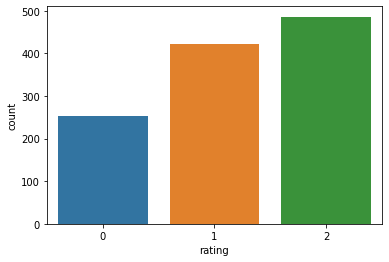

In [72]:
print('min =',df['rating'].min())
print('max =',df['rating'].max())
sns.countplot(data=df, x=df['rating'])
plt.show()

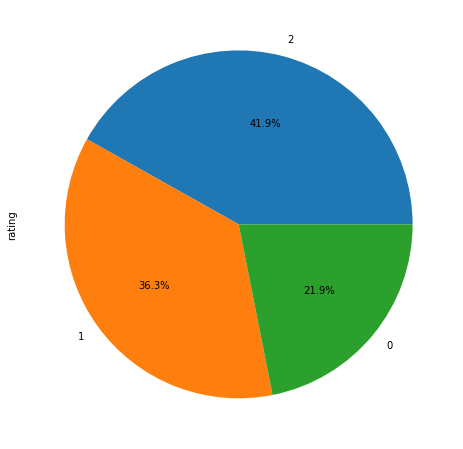

In [73]:
df['rating'].value_counts().plot(kind='pie', autopct = '%0.1f%%', figsize = (10,8))

### 2.5 Check number of unique users and items (places) in the data

In [74]:
df['userID'].nunique()

138

In [75]:
df['placeID'].nunique()

130

### 2.6 Sort users by their number of ratings and display top 10 users who have given most number of ratings

In [76]:
df.groupby('userID')['rating'].count().sort_values(ascending= False).head(10)

userID
U1061    18
U1106    18
U1134    16
U1024    15
U1022    14
U1089    14
U1137    14
U1135    14
U1003    13
U1016    13
Name: rating, dtype: int64

In [77]:
df['userID'].value_counts().head(10)

U1061    18
U1106    18
U1134    16
U1024    15
U1022    14
U1135    14
U1137    14
U1089    14
U1071    13
U1003    13
Name: userID, dtype: int64

### 2.7. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 5 or more number of ratings). Report shape of the final dataset

In [78]:
counts = df['userID'].value_counts()

In [79]:
df_final= df[df['userID'].isin(counts[counts >= 5].index)]
df_final.shape

(1079, 5)

### 2.8 Check number of unique users and items and comment on which kind of collaborative filtering should be applied

In [80]:
df_final['userID'].nunique()

115

In [81]:
df_final['placeID'].nunique()

129

since the count of the User and the Place is close enough so we can use any kind of collaborative filter. 

## 3. Popularity Recommender model. (Non-personalised)

### 3.1 Check count of user_id for each unique product and save it as score 

In [82]:
df_final['placeID'].value_counts()

135085    36
132825    32
135032    28
132834    25
135052    25
          ..
135109     2
132668     1
132715     1
134975     1
132564     1
Name: placeID, Length: 129, dtype: int64

In [91]:
data = pd.DataFrame(df_final['placeID'].value_counts()).reset_index()
data.columns = ['placeID','Score']

In [92]:
data.head(10)

,placeID,Score
0,135085,36
1,132825,32
2,135032,28
3,132834,25
4,135052,25
5,135038,24
6,135060,22
7,135062,21
8,135042,20
9,132862,18


### 3.2 Sort the products based on the score (calculated above)

In [93]:
data.head(10) #as the value is already sorted when used value_counts()

,placeID,Score
0,135085,36
1,132825,32
2,135032,28
3,132834,25
4,135052,25
5,135038,24
6,135060,22
7,135062,21
8,135042,20
9,132862,18


### 3.3 Create a new column called 'Rank' having the ascending recommendation rank based upon score 

In [95]:
data['Rank'] =data['Score'].rank(ascending = False, method='first')
data.head(10)

,placeID,Score,Rank
0,135085,36,1.0
1,132825,32,2.0
2,135032,28,3.0
3,132834,25,4.0
4,135052,25,5.0
5,135038,24,6.0
6,135060,22,7.0
7,135062,21,8.0
8,135042,20,9.0
9,132862,18,10.0


### 3.4 Get the top 10 recommendation based on their rank

In [96]:
data.head(10)

,placeID,Score,Rank
0,135085,36,1.0
1,132825,32,2.0
2,135032,28,3.0
3,132834,25,4.0
4,135052,25,5.0
5,135038,24,6.0
6,135060,22,7.0
7,135062,21,8.0
8,135042,20,9.0
9,132862,18,10.0


## 4. Collaborative Filtering model

### 4.1 Define rating scale and convert dataframe into surprise dataset

In [97]:
reader = Reader(rating_scale=(0,2))
dataset= Dataset.load_from_df(df_final[['userID','placeID','rating']],reader)

### 4.2 Split the above surprise dataset into train and test set using surprise split function

In [98]:
trainset, testset= train_test_split(dataset, test_size= 0.25, random_state=1)

In [99]:
trainset

In [100]:
testset

[('U1062', 135085, 0.0),
 ('U1112', 135026, 1.0),
 ('U1113', 135046, 2.0),
 ('U1081', 135043, 0.0),
 ('U1064', 135052, 2.0),
 ('U1053', 132825, 1.0),
 ('U1056', 135085, 2.0),
 ('U1045', 132834, 1.0),
 ('U1088', 135082, 2.0),
 ('U1075', 135066, 2.0),
 ('U1048', 135034, 2.0),
 ('U1006', 132572, 1.0),
 ('U1033', 135045, 2.0),
 ('U1050', 132560, 0.0),
 ('U1043', 132613, 1.0),
 ('U1058', 135076, 2.0),
 ('U1019', 132834, 0.0),
 ('U1049', 135085, 0.0),
 ('U1100', 134976, 2.0),
 ('U1013', 135085, 1.0),
 ('U1066', 135019, 2.0),
 ('U1059', 132754, 2.0),
 ('U1085', 132872, 0.0),
 ('U1064', 135060, 1.0),
 ('U1049', 135042, 0.0),
 ('U1126', 135057, 2.0),
 ('U1098', 132825, 1.0),
 ('U1013', 132951, 2.0),
 ('U1112', 132572, 0.0),
 ('U1086', 135063, 1.0),
 ('U1033', 132572, 1.0),
 ('U1026', 132654, 0.0),
 ('U1022', 135081, 0.0),
 ('U1003', 132862, 1.0),
 ('U1084', 132723, 1.0),
 ('U1050', 132609, 0.0),
 ('U1108', 132723, 2.0),
 ('U1033', 132951, 2.0),
 ('U1120', 132846, 2.0),
 ('U1100', 132768, 2.0),


### 4.3 Print size of train and test set

In [101]:
len(testset)

270

In [103]:
trainset.n_ratings

809

### 4.4 Build a default SVD model using train set

In [105]:
from surprise import SVD
algo = SVD()
algo.fit(trainset)

### 4.5 Make prediction for test set and convert test prediction into a dataframe

In [106]:
pred = algo.test(testset)
pred_df= pd.DataFrame(pred)

In [107]:
pred_df.head(5)

,uid,iid,r_ui,est,details
0,U1062,135085,0.0,0.850734,{'was_impossible': False}
1,U1112,135026,1.0,0.979763,{'was_impossible': False}
2,U1113,135046,2.0,1.050058,{'was_impossible': False}
3,U1081,135043,0.0,0.904800,{'was_impossible': False}
4,U1064,135052,2.0,1.047553,{'was_impossible': False}


### 4.6 Check RMSe and MAE of train and test predictions

In [111]:
tran_pred = algo.test(trainset.build_testset())
print('rmse=',accuracy.rmse(tran_pred))
print('mae=',accuracy.mae(tran_pred))

RMSE: 0.4717
rmse= 0.47165080796509706
MAE:  0.3960
mae= 0.39603357418632934


In [109]:
accuracy.rmse(pred)

RMSE: 0.6768


0.6768087605030207

In [110]:
accuracy.mae(pred)

MAE:  0.5814


0.581352613646994

### 4.7 Write a function to make top n recommendation to a user. The function should take a userID, data, and n as input arguments

In [112]:
from collections import defaultdict
def get_top_n(predictions, userid, n):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n[userid]


### 4.8 Check top 3 recommendations for userID:- 'U1028'

In [113]:
get_top_n(pred,'U1028',3)

[(132733, 1.078977795273452),
 (132613, 1.0759236053093453),
 (132663, 0.9561110374128805)]

## 5. Summarize your insights

If we remove the rating of the place with 1 then we can get better result. The test and train set we got was of diffent format and reading those we have to use different method. Test set was of readable format but not the train set 

## Optional
### Use GridSearch CV to get the best parameters for SVD model